# market impact model from problem 2

In [1]:
coeffs = [698.74940594355189, 0.3429159597976898, 0.55893058943625173, 0.74906715225239062, 0.97462393173698603]     #from problem 2

def MI_model(shares,v,time,size):
    "market impact function"
    ADV = shares/ size
    POV = shares/(shares+time*ADV)  
    
    
    return coeffs[0]*(size**coeffs[1])*(v **coeffs[2]) * (coeffs[4]*(POV **coeffs[3])+ (1-coeffs[4]))

def TR(time,sigma):
    return sigma*np.sqrt(1/250.*1/3.*time)*(10**4)


    

# import initial data

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


#Stock = 'RLK'
Shares = 100000
#Side = Buy
Price = 50
ADV = 1000000
Volatility = 0.25
Size = 0.10
time = 1

In [3]:
mi = MI_model(Shares,Volatility,time,Size)
mi

27.350209284781116

# Calculate the Optimal POV rate that solves the Trader’s Dilemma for a Lambda value of 1.
# Minimize MI + Lambda * TR (where Lambda=1).

In [4]:
Lambda = 1
time = 1

def fuc(time):
    return MI_model(Shares,Volatility,time,Size) + Lambda * TR(time,Volatility)

fuc(time)

118.6373022023088

In [5]:
con = [((Shares/0.9-Shares)/ADV,(Shares/0.005-Shares)/ADV)]

res = minimize(fuc, 1,  bounds=con,
                method='SLSQP', options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 103.893250096
            Iterations: 8
            Function evaluations: 29
            Gradient evaluations: 8


# the Optimal time

In [6]:
print(res.x)

[ 0.34851922]


# the Optimal POV rate

In [7]:
time  =  res.x
POV = Shares/(Shares+time*ADV)  
POV

array([ 0.22295589])

# market impact

In [8]:
MI_model(Shares,Volatility,time,Size) 

array([ 50.00144352])

# Calculate the Optimal POV rate that maximizes the probability of out-performing a cost of 80bp. 
#  Price Improvement strategy

In [9]:
cost = 80                                #80bp

def pi(time,sign = -1):
    #sign = -1 the function is to maximize
    return sign*(cost - MI_model(Shares,Volatility,time,Size))/TR(time,Volatility)

pi(1,sign = -1)

-0.57674956045302872

In [10]:
res1 = minimize(pi, 1,  bounds=con,
                method='SLSQP', options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.609890788423
            Iterations: 7
            Function evaluations: 23
            Gradient evaluations: 7


# the Optimal time

In [11]:
print(res1.x)

[ 0.59284204]


# the Optimal POV rate

In [12]:
time1  =  res1.x
POV_pi = Shares/(Shares+time1*ADV)  
POV_pi

array([ 0.14433304])

# Construct the Efficient Trading Frontier – e.g., the set of all optimal trading strategies. 
# This is similar to the efficient frontier. The y-axis is the Market Impact Cost and the x-axis is the Timing Risk. 

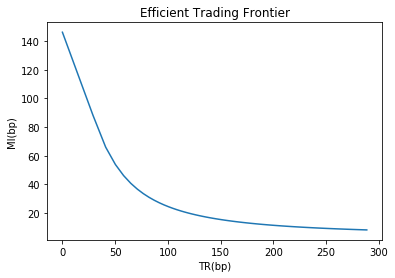

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


Shares = 100000

Price = 50
ADV = 1000000
Volatility = 0.25
Size = 0.10
time = 1

y = [MI_model(Shares,Volatility,time,Size) for time in np.linspace(0,10,100,)]
x = [TR(time,Volatility) for time in np.linspace(0,10,100)]
#print y
plt.plot(x,y)
plt.xlabel('TR(bp)')
plt.ylabel('MI(bp)')
plt.title('Efficient Trading Frontier')

# Select your initial trading strategy based on the optimization of the Trader’s Dilemma using a lambda value of 1. 
# Refer to this initial Optimal POV rate as POV* and the initial optimal Market Impact Cost as MI*.


one-half way through the order (e.g., __50% complete__) for the following scenarios

In [14]:
POV_star  = POV
time_star = res.x
POV_star,time_star


(array([ 0.22295589]), array([ 0.34851922]))

# Optimal AIM Strategy

In [15]:
con = [((Shares/0.9-Shares)/ADV,(Shares/0.005-Shares)/ADV)]

#Stock = 'RLK'
Shares = 100000
Price = 50
ADV = 1000000
Volatility = 0.25
Size = 0.10

theta = 0.5   #50% complete
side = 1      #buy
delta_P = 0.1
relized_cost  = 0.05

def p_cost(time):
    
    M_cost  = (1-theta) * delta_P * side * Shares
    #print M_cost
    
    mi_remain   =  (1-theta) * MI_model(Shares,Volatility,time,Size) / 10000 * Price * Shares
    #print mi_remain

    projected_cost = relized_cost + M_cost + mi_remain
    
    return projected_cost
p_cost(time_star)

array([ 17500.41087963])

In [30]:
def TR_t(time):
    return Volatility*np.sqrt((1-theta)*1/250.*1/3.*time)* Price * Shares

TR_t(time_star)

array([ 11432.17856441])

In [31]:
ini_cost = MI_model(Shares,Volatility,time_star,Size)/10000 * Price * Shares
ini_cost

array([ 18791.19911095])

In [32]:
def AIM(t):
    M_cost  = (1-theta)*delta_P*side * Shares
    
    mi_remain   =  (1-theta)*MI_model(Shares,Volatility,t,Size) / 10000 *Price * Shares

    projected_cost = relized_cost+M_cost+mi_remain
    
    ini_cost = MI_model(Shares,Volatility,time_star,Size)/10000 * Price * Shares
    
    TR_t = Volatility*np.sqrt((1-theta)*1/250.*1/3.*t) * Price * Shares
    
    return -(ini_cost-projected_cost)/TR_t

AIM(time_star)

array([-0.77810625])

In [33]:
res_a = minimize(AIM, 1,  bounds=con,
                method='SLSQP', options={'disp': True})


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.781830049664
            Iterations: 11
            Function evaluations: 39
            Gradient evaluations: 11


## time 

In [34]:
print res_a.x

[ 0.40174085]


## POV

In [35]:
time_aim  =  res_a.x
POV_pi = Shares/(Shares+time_aim*ADV)  
POV_pi


array([ 0.19930608])

In [36]:
# AIM plot

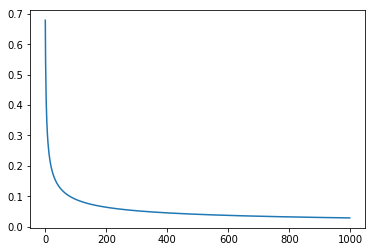

In [37]:
plt.plot([-AIM(t) for t in xrange(1,1000)])

# PIM

In [38]:
#Stock = 'RLK'
Shares = 100000
Price = 50
ADV = 1000000
Volatility = 0.15
Size = 0.10

theta = 0.5   #50% complete
side = 1      #buy
delta_P = 0.01
relized_cost  = 0.15



In [39]:
def PIM(t):
    M_cost  = (1-theta)*delta_P*side * Shares
    
    mi_remain   =  (1-theta)*MI_model(Shares,Volatility,t,Size)/10000 * Price * Shares
    
    projected_cost = relized_cost+M_cost+mi_remain
    
    ini_cost = MI_model(Shares,Volatility,time_star,Size)/10000 * Price * Shares
    
    TR_t = Volatility*np.sqrt((1-theta)*1/250.*1/3*t) * Price * Shares
    
    return -(projected_cost-ini_cost)/TR_t

PIM(time_star)

array([ 0.77810625])

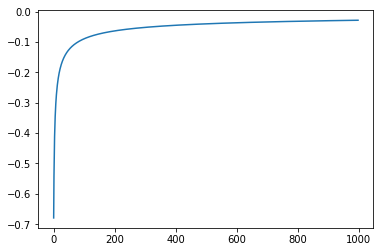

In [40]:
plt.plot([-PIM(t) for t in xrange(1,1000)])

In [41]:
res_p = minimize(PIM, 1,  bounds= con,
                method='SLSQP', options={'disp': True})


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.197811770453
            Iterations: 9
            Function evaluations: 27
            Gradient evaluations: 9


# time

In [42]:
print res_p.x

[ 19.9]


# POV

In [43]:
time_pim  =  res_p.x
POV_pi = Shares/(Shares+time_pim*ADV)  
POV_pi

array([ 0.005])